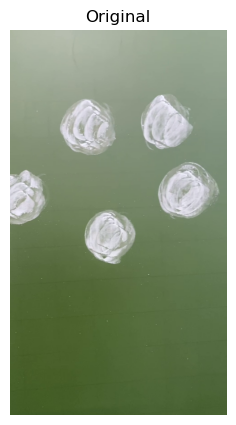

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")
    
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

cap = cv2.VideoCapture(r'D:\\video.mp4')

frame_index = 200 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()

if ret:
    fig = plt.figure(figsize=(10, 5))
   
   
gray_image = color.rgb2gray(frame)
show_image(frame, "Original")

cap.release()

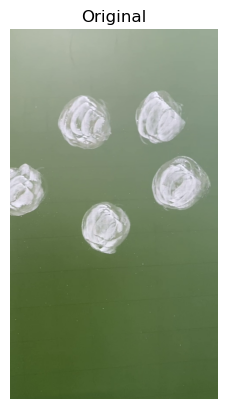

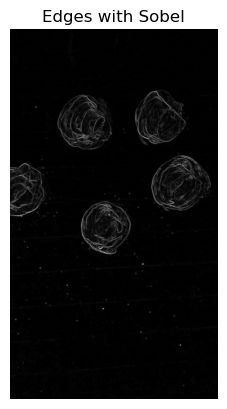

In [29]:
#Bài tập 2.1: Phát hiện cạnh

from skimage.filters import sobel

edge_sobel = sobel(gray_image)
show_image(frame, "Original")
show_image(edge_sobel, "Edges with Sobel")

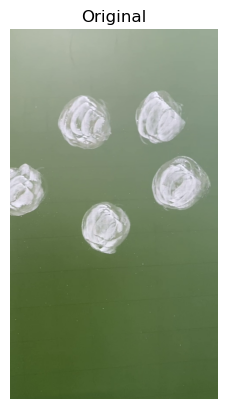

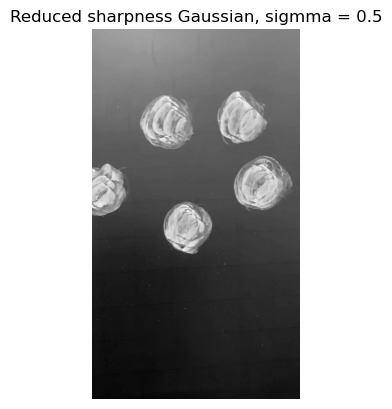

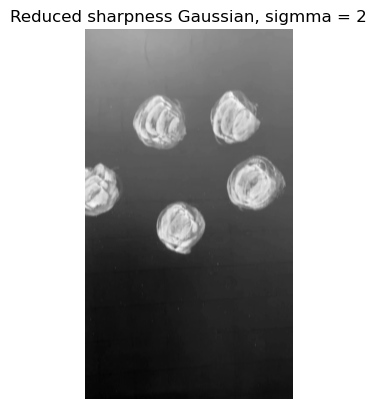

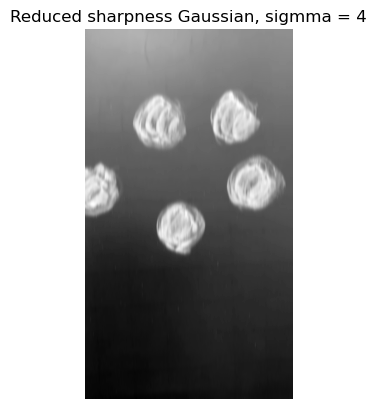

In [30]:
#Bài tập 2.2: Lọc nhiễu cho ảnh 

from skimage.filters import gaussian

gaussian_image_1 = gaussian(gray_image,sigma = 0.5,  channel_axis=True)
gaussian_image_2 = gaussian(gray_image,sigma = 2,  channel_axis=True)
gaussian_image_3 = gaussian(gray_image,sigma = 4,  channel_axis=True)
show_image(frame, "Original")
show_image(gaussian_image_1, "Reduced sharpness Gaussian, sigmma = 0.5")
show_image(gaussian_image_2, "Reduced sharpness Gaussian, sigmma = 2")
show_image(gaussian_image_3, "Reduced sharpness Gaussian, sigmma = 4")

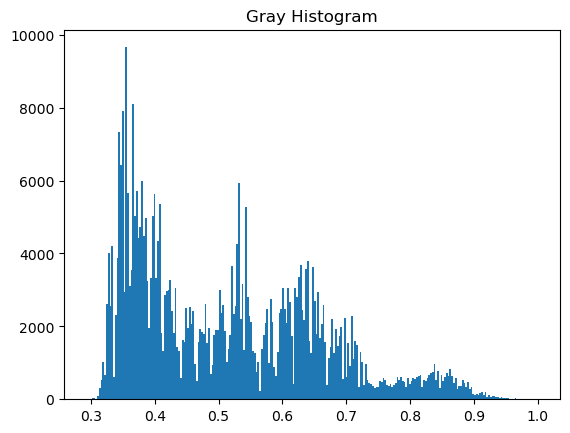

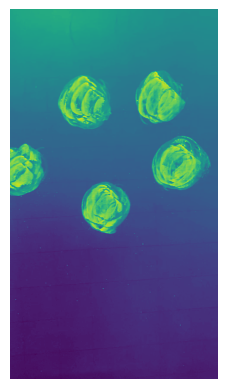

In [31]:
#Bài tập 2.3: Khảo sát lược đồ mức xám

plt.hist(gray_image.ravel(), bins=256)
# Đặt tên cho khung hình và hiển thị
plt.title('Gray Histogram')
plt.figure()
plt.axis('off')  
plt.imshow(gray_image)

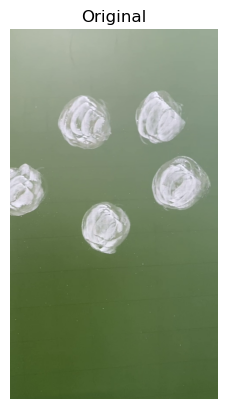

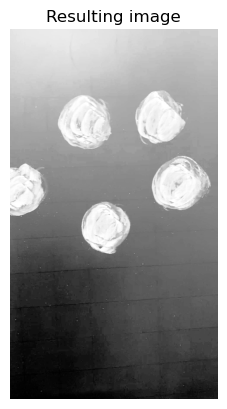

In [32]:
#Bài tập 2.4: Cân bằng Histogram

from skimage import exposure

image_eq = exposure.equalize_hist(gray_image)
show_image(frame, "Original")
show_image(image_eq, 'Resulting image')


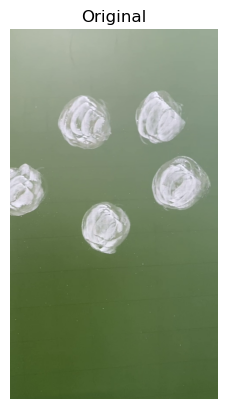

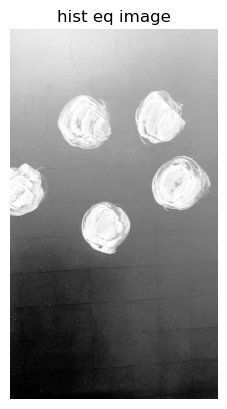

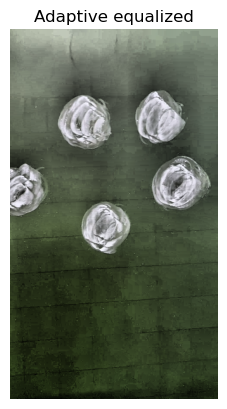

In [33]:
#Bài tập 2.6: Tăng cường độ tương phản sử dụng cân bằng lược đồ mứcxám cục bộ

from skimage import exposure
# Áp dụng cân bằng lược đồ mức xám cục bộ
image_adapteq = exposure.equalize_adapthist(frame,clip_limit=0.03)
# Hiển thị ảnh gốc và ảnh kết quả
show_image(frame, 'Original')
show_image(image_eq, 'hist eq image')
show_image(image_adapteq, 'Adaptive equalized')


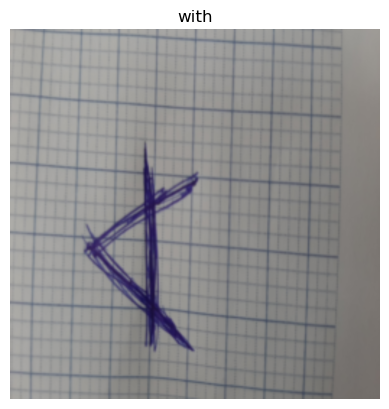

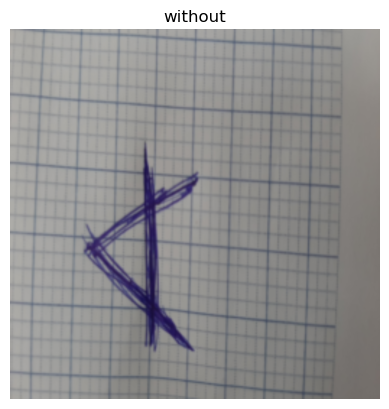

In [47]:
#Bài tập 2.7: Giảm thiểu hiệu ứng răng cưa trong ảnh; xoay và thay đổi tỷ lệ của ảnh

from skimage.transform import rotate,rescale,resize
# đọc ảnh 
img =plt.imread("C:\\Users\\PC\\TT_XULY_ANH\\TUAN_2\\anh_chu.jpg")

resizeImg= resize(img,(256,256))

RotatedImage= rotate(resizeImg,90)

# # Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa\
Zoom_2x_A= rescale(RotatedImage,20,anti_aliasing=True,channel_axis=-1)
# # tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(RotatedImage,20,anti_aliasing=False,channel_axis=-1)

show_image(Zoom_2x_A, 'with')
show_image(Zoom_2x_B, 'without')


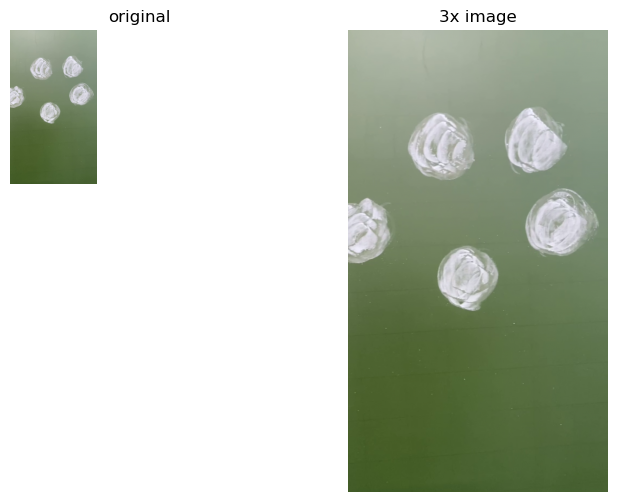

In [70]:
#Bài tập 2.8: Thay đổi kích thước ảnh

from skimage.transform import resize

height = frame.shape[0] * 3
width = frame.shape[1] * 3
# Thay đổi kích thước ảnh
image_resized = resize (frame, (height, width), anti_aliasing=True)
plot_comparison(frame,image_resized,"3x image")

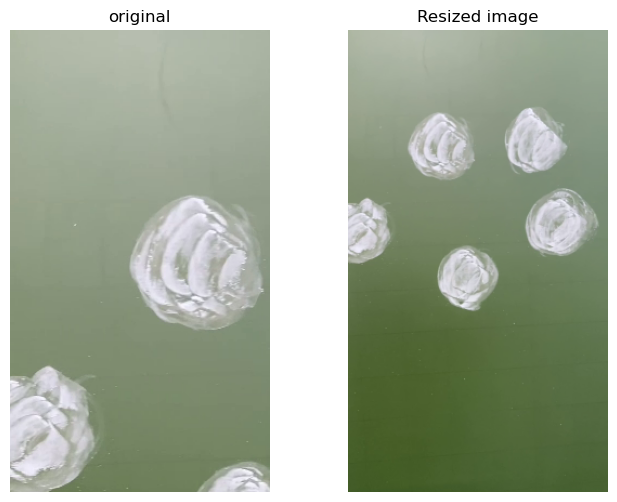

In [72]:
#Bài tập 2.9: Thay đổi tỷ lệ ảnh thông qua điều chỉnh trực tiếp số hàng số cột của ảnh

from skimage.transform import resize

height =int(frame.shape[0]/ 2)
width = int(frame.shape[1]/ 2)
image_resized = resize (frame, (height, width), anti_aliasing=True)
# Hiển thị kết quả và so sánh
plot_comparison(frame,image_resized,"Resized image")

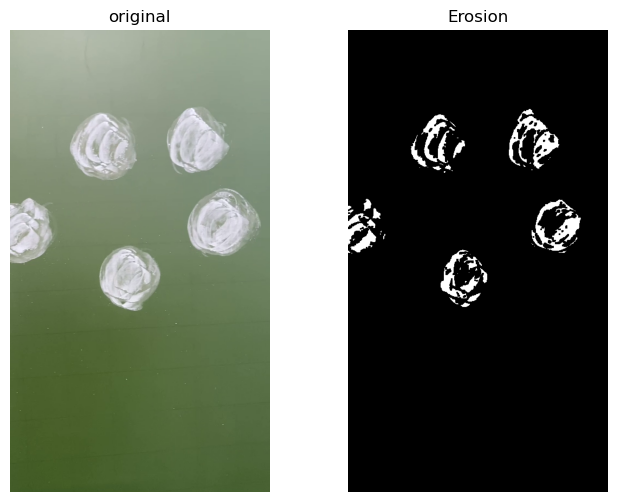

In [92]:
#Bài tập 2.10: Xử lý Hình thái học

# Khai báo thư viện morphology
from skimage import morphology

binary_image=gray_image>0.8
selem = morphology.rectangle(3,3)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion
eroded_image = morphology.binary_erosion(binary_image, footprint = selem)
# Hiển thị kết quả
plot_comparison(frame, eroded_image, 'Erosion')

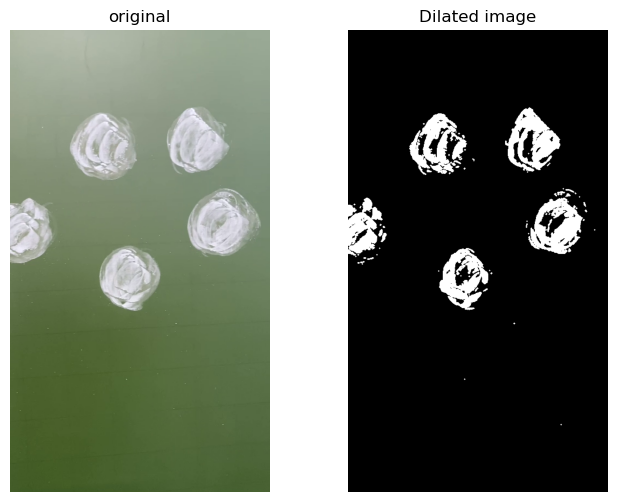

In [97]:
#Bài tập 2.11: Cải thiện kết quả phân ngưỡng ảnh

# Giãn nở với ảnh nhị phân
#Khai báo thư viện morphology
from skimage import morphology

# Giãn nở với ảnh nhị phân
dilated_image = morphology.binary_dilation(binary_image)
# Hiển thị kết quả
plot_comparison(frame, dilated_image, 'Dilated image')